In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import cmocean

/home/sridge/.conda/envs/ml_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sridge/.conda/envs/ml_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sridge/.conda/envs/ml_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sridge/.conda/envs/ml_env/lib/python3.6/site-pack

In [2]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_absolute_error'])
    plt.plot(h['val_mean_absolute_error'])
    plt.title('Training vs Validation MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return

In [3]:
df = pd.read_csv('data.csv')

# Linear Regression Benchmark

In [4]:
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

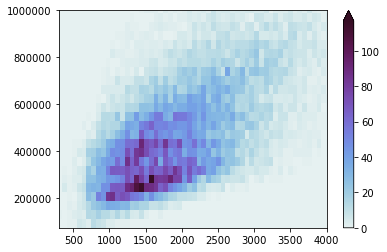

In [5]:
_,_,_,_=plt.hist2d(df.sqft_living, df.price,
              bins=200,cmap=cmocean.cm.dense)
plt.xlim(300,4000)
plt.ylim(7.5e4,1e6)
plt.colorbar(extend='max')

In [6]:
m, b, r_value, p_value, std_err = stats.linregress(df.sqft_living,df.price)

Text(2800, 250000.0, 'RMSE: $261,441')

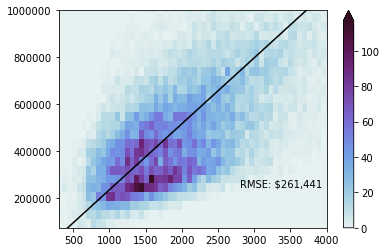

In [7]:
_,_,_,_=plt.hist2d(df.sqft_living, df.price,
              bins=200,cmap=cmocean.cm.dense)
plt.xlim(300,4000)
plt.ylim(7.5e4,1e6)
plt.colorbar(extend='max')

sqft = np.linspace(0,1e4,10)

y_lin = m*sqft + b

plt.plot(sqft,y_lin,color='k')

y_lin = m*df.sqft_living + b

rmse = (((df.price-y_lin)**2).sum()/len(y_lin))**0.5

plt.text(x=2800,y=2.5e5,s=f'RMSE: ${rmse:,g}')

# **NN**

In [8]:
feature_list = ['sqft_living','zipcode','bathrooms','bedrooms','waterfront','sqft_lot']

In [9]:
X = df[feature_list]

Y = df['price']

In [10]:
X_norm = (X-X.min())/X.max()

In [11]:
nx = len(X.columns)
ny = 1

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
def simple_NN(nx, ny):
    t_model = keras.Sequential()
    t_model.add(keras.layers.Dense(32, activation='tanh', input_shape=(nx,)))
    t_model.add(keras.layers.Dense(32, activation='relu'))
    t_model.add(keras.layers.Dense(32, activation='relu'))
    t_model.add(keras.layers.Dense(16, activation='relu'))
    t_model.add(keras.layers.Dense(ny))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=keras.optimizers.Adam(),
        metrics=[keras.metrics.mae])
    return(t_model)

In [14]:
model = simple_NN(nx,ny)

hist = model.fit(x=X, y=Y,
                     batch_size=128, epochs=500, verbose=0,
                     validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________
None


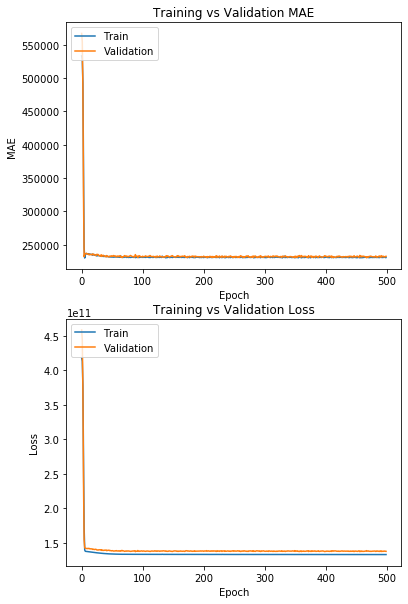

In [15]:
plot_hist(hist.history)

# Effect of normalizing inputs

In [16]:
hist = model.fit(x=X_norm, y=Y,
                     batch_size=128, epochs=500, verbose=0,
                     validation_split=0.2)

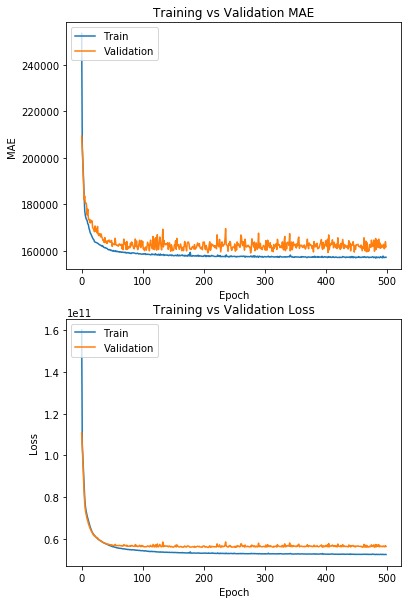

In [17]:
plot_hist(hist.history)

# Plot spatial pattern of bias (without using lat/long as an input)

In [18]:
Y_hat = model.predict(X_norm)
mod_err = Y_hat.squeeze()-Y

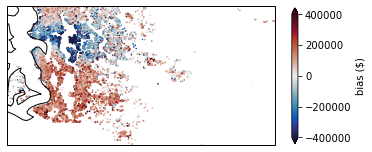

In [20]:
import cartopy
import cartopy.crs as ccrs

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([df.long.min(), df.long.max(), df.lat.min(), df.lat.max()], crs=ccrs.PlateCarree())
cax = plt.scatter(df['long'],df['lat'],c=mod_err,cmap=cmocean.cm.balance,vmin=-4e5,vmax=4e5,s=.25)
plt.colorbar(shrink=0.25,label='bias ($)',extend='both')
ax.coastlines(resolution='10m')

# Add Lat/Long as an input

In [21]:
X = df[feature_list+['lat','long']]

Y = df['price']

In [22]:
X_norm = (X-X.min())/X.max()
X_norm = (X-X.mean())/X.std()

In [23]:
nx = len(X.columns)
ny = 1

In [24]:
model = simple_NN(nx,ny)

hist = model.fit(x=X_norm, y=Y,
                     batch_size=128, epochs=100, verbose=0,
                     validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________
None


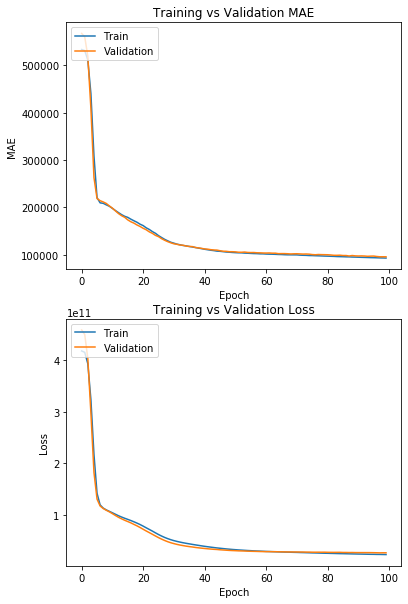

In [25]:
plot_hist(hist.history)

In [26]:
Y_hat = model.predict(X_norm)
mod_err = Y_hat.squeeze()-Y

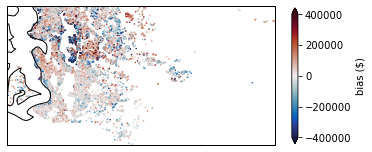

In [33]:
import cartopy
import cartopy.crs as ccrs

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([df.long.min(), df.long.max(), df.lat.min(), df.lat.max()], crs=ccrs.PlateCarree())
cax = plt.scatter(df['long'],df['lat'],c=mod_err,cmap=cmocean.cm.balance,vmin=-4e5,vmax=4e5,s=.25)
plt.colorbar(shrink=0.25,label='bias ($)',extend='both')
ax.coastlines(resolution='10m')

### Below is a figure of waterfront homes. Prediction of home prices near the waterfront are biased low in value. This is because despite not being listed as waterfront, they likely have waterviews that boost their value.

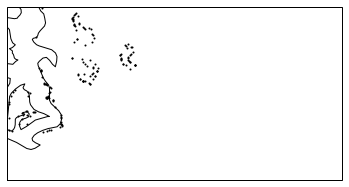

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([df.long.min(), df.long.max(), df.lat.min(), df.lat.max()], crs=ccrs.PlateCarree())
cax = plt.scatter(df['long'].loc[df.waterfront==1],df['lat'].loc[df.waterfront==1],c='k',cmap=cmocean.cm.thermal,vmin=0,vmax=1e6,s=1)

ax.coastlines(resolution='10m')

# Actual Price

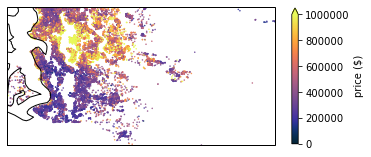

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([df.long.min(), df.long.max(), df.lat.min(), df.lat.max()], crs=ccrs.PlateCarree())
cax = plt.scatter(df['long'],df['lat'],c=df.price,cmap=cmocean.cm.thermal,vmin=0,vmax=1e6,s=.25)
plt.colorbar(shrink=0.25,label='price ($)',extend='max')
ax.coastlines(resolution='10m')

# Predicted price

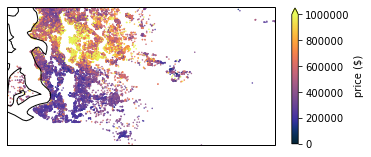

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([df.long.min(), df.long.max(), df.lat.min(), df.lat.max()], crs=ccrs.PlateCarree())
cax = plt.scatter(df['long'],df['lat'],c=Y_hat.squeeze(),cmap=cmocean.cm.thermal,vmin=0,vmax=1e6,s=.25)
ax.coastlines(resolution='10m')
plt.colorbar(shrink=0.25,label='price ($)',extend='max')

In [31]:
model.evaluate(X_norm,Y)

21613/21613 [==============================] - 0s 6us/step


[23587676179.377968, 93295.47598089113]

In [32]:
model.metrics_names

['loss', 'mean_absolute_error']